Step 1: Dataset loaded with 506 houses and 14 features.

Step 2: EDA - First few rows of the dataset:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7  396.90   5.33  36.2

Summary statistics:
             CRIM          ZN       INDUS         NOX          RM         AGE         DIS         TAX     PTRATIO           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  

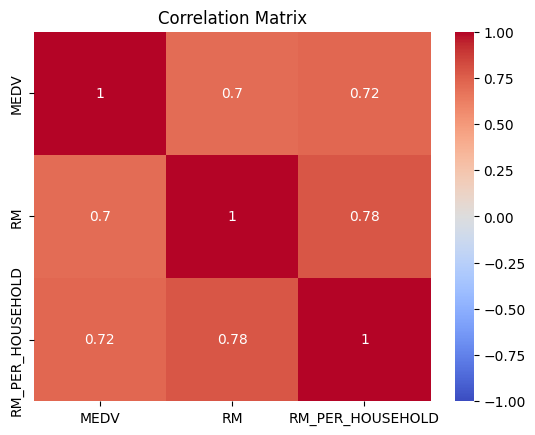


Step 6: Histograms of Features:


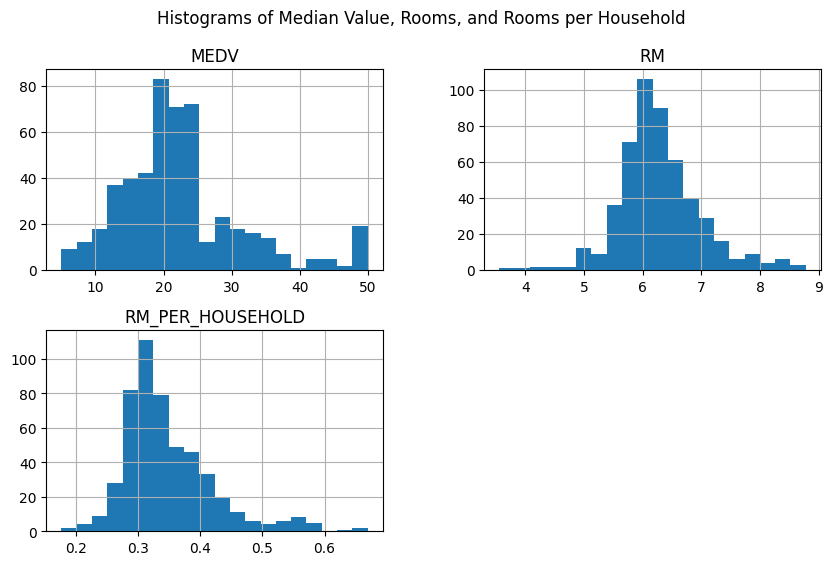


Step 7: Data Split - Training: (354, 2) Test: (76, 2) Validation: (76, 2)

Step 9: Performance Metrics:
Linear Regression - Test MSE: 18.20, R-squared: 0.72
Linear Regression - Validation MSE: 46.36, R-squared: 0.42
Random Forest (Bagging) - Test MSE: 23.77, R-squared: 0.64
Random Forest (Bagging) - Validation MSE: 32.13, R-squared: 0.60
Gradient Boosting (Boosting) - Test MSE: 26.78, R-squared: 0.59
Gradient Boosting (Boosting) - Validation MSE: 32.34, R-squared: 0.59


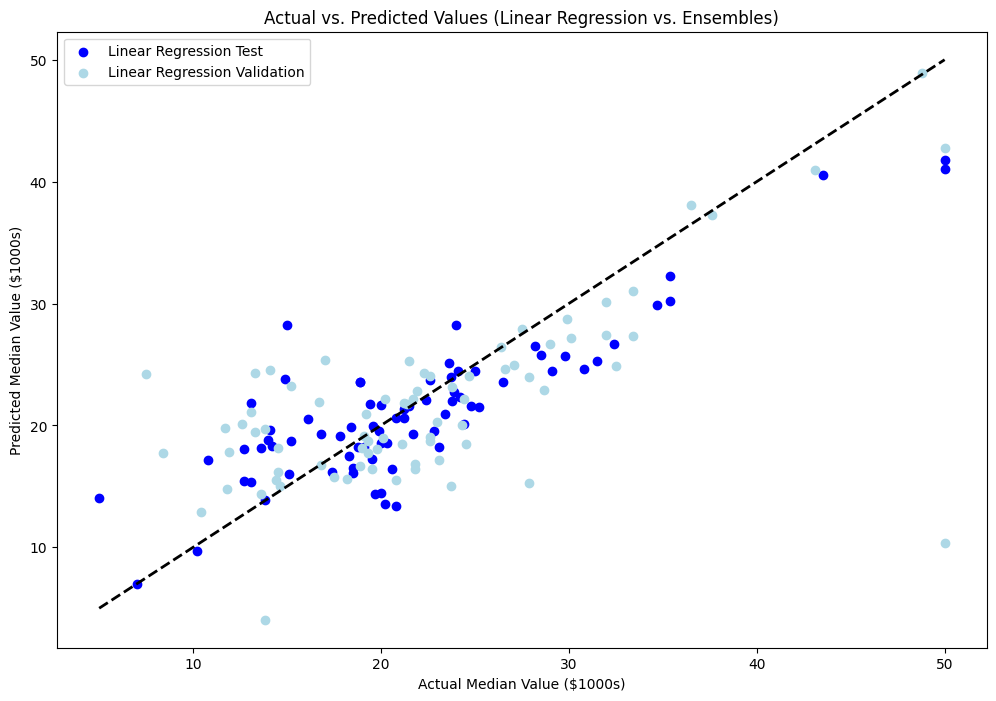


Interactive Prediction: Enter values for RM and RM_PER_HOUSEHOLD to predict MEDV


C:\Users\khaai\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\khaai\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\khaai\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\khaai\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\khaai\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid

Linear Regression Predicted Median Value: $29.22K
Random Forest (Bagging) Predicted Median Value: $22.78K
Gradient Boosting (Boosting) Predicted Median Value: $23.80K
Closest Actual Value: $0.02K (based on RM=6.00)
Differences: LR: $29.19K, RF: $22.76K, GB: $23.78K
Expected Future Value (10% more rooms) - LR: $34.88K, RF: $30.18K, GB: $27.40K


In [2]:
## Rewritten Full Code Below


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Step 1: Reading the File
# Load the Boston Housing Dataset from Scikit-learn

boston = fetch_openml(name="boston", version=1)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target  # Median house value in $1000s
print("Step 1: Dataset loaded with", df.shape[0], "houses and", df.shape[1], "features.")

"""
| Column Name | Description |
|-------------|-------------|
| CRIM        | Per capita crime rate by town |
| ZN          | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS       | Proportion of non-retail business acres per town |
| CHAS        | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| NOX         | Nitric oxides concentration (parts per 10 million) |
| RM          | Average number of rooms per dwelling |
| AGE         | Proportion of owner-occupied units built prior to 1940 |
| DIS         | Weighted distances to five Boston employment centers |
| RAD         | Index of accessibility to radial highways |
| TAX         | Full-value property-tax rate per $10,000 |
| PTRATIO     | Pupil-teacher ratio by town |
| B           | 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town |
| LSTAT       | % lower status of the population |
| MEDV        | Median value of owner-occupied homes in $1000’s |
"""


# Step 2: Exploratory Data Analysis (EDA)
pd.set_option('display.width', 1000)
print("\nStep 2: EDA - First few rows of the dataset:")
print(df.head())
print ("\nSummary statistics:")
print(df.describe())


# Step 3: Data Cleaning
# Check for missing values and handle them (none in this dataset, but shown as example)
print("\nStep 3: Checking for missing values:")
print(df.isnull().sum())



# Step 4: Feature Engineering and Selecting Final Features
# Create a new feature: rooms per household
df['RM_PER_HOUSEHOLD'] = df['RM'] / df['PTRATIO']  # Rooms divided by pupil-teacher ratio
# Select final features: RM (rooms) and RM_PER_HOUSEHOLD as predictors
selected_features = ['RM', 'RM_PER_HOUSEHOLD']
X = df[selected_features]
y = df['MEDV']

# Step 5: Correlation Matrix
print("\nStep 5: Correlation Matrix:")
correlation_matrix = df[['MEDV', 'RM', 'RM_PER_HOUSEHOLD']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


# Step 6: Create Histograms of Various Features
print("\nStep 6: Histograms of Features:")
df[['MEDV', 'RM', 'RM_PER_HOUSEHOLD']].hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms of Median Value, Rooms, and Rooms per Household")
plt.show()


# Step 7: How to Create Training, Test, and Validation Data
# Split into training (70%), test (15%), and validation (15%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42)  # 0.15/(0.85) ≈ 0.1765
print("\nStep 7: Data Split - Training:", X_train.shape, "Test:", X_test.shape, "Validation:", X_val.shape)

# Step 8: Model Training and Selection
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Train Bagging (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train, y_train)

# Train Boosting (Gradient Boosting)
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)


lr_test_pred = lr_model.predict(X_test)
lr_val_pred = lr_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)
rf_val_pred = rf_model.predict(X_val)
gb_test_pred = gb_model.predict(X_test)
gb_val_pred = gb_model.predict(X_val)


# Metrics for Linear Regression
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_val_mse = mean_squared_error(y_val, lr_val_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_val_r2 = r2_score(y_val, lr_val_pred)

# Metrics for Random Forest (Bagging)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_val_mse = mean_squared_error(y_val, rf_val_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_val_r2 = r2_score(y_val, rf_val_pred)

# Metrics for Gradient Boosting (Boosting)
gb_test_mse = mean_squared_error(y_test, gb_test_pred)
gb_val_mse = mean_squared_error(y_val, gb_val_pred)
gb_test_r2 = r2_score(y_test, gb_test_pred)
gb_val_r2 = r2_score(y_val, gb_val_pred)





print("\nStep 9: Performance Metrics:")
print("Linear Regression - Test MSE: {:.2f}, R-squared: {:.2f}".format(lr_test_mse, lr_test_r2))
print("Linear Regression - Validation MSE: {:.2f}, R-squared: {:.2f}".format(lr_val_mse, lr_val_r2))
print("Random Forest (Bagging) - Test MSE: {:.2f}, R-squared: {:.2f}".format(rf_test_mse, rf_test_r2))
print("Random Forest (Bagging) - Validation MSE: {:.2f}, R-squared: {:.2f}".format(rf_val_mse, rf_val_r2))
print("Gradient Boosting (Boosting) - Test MSE: {:.2f}, R-squared: {:.2f}".format(gb_test_mse, gb_test_r2))
print("Gradient Boosting (Boosting) - Validation MSE: {:.2f}, R-squared: {:.2f}".format(gb_val_mse, gb_val_r2))



# Visualize predictions vs. actual values for all models
plt.figure(figsize=(12, 8))
plt.scatter(y_test, lr_test_pred, color='blue', label='Linear Regression Test')
plt.scatter(y_val, lr_val_pred, color='lightblue', label='Linear Regression Validation')
# plt.scatter(y_test, rf_test_pred, color='green', label='Random Forest Test')
# plt.scatter(y_val, rf_val_pred, color='lightgreen', label='Random Forest Validation')
# plt.scatter(y_test, gb_test_pred, color='red', label='Gradient Boosting Test')
# plt.scatter(y_val, gb_val_pred, color='pink', label='Gradient Boosting Validation')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Median Value ($1000s)")
plt.ylabel("Predicted Median Value ($1000s)")
plt.title("Actual vs. Predicted Values (Linear Regression vs. Ensembles)")
plt.legend()
plt.show()



# Interactive Prediction for Given Values
print("\nInteractive Prediction: Enter values for RM and RM_PER_HOUSEHOLD to predict MEDV")
while True:
    try:
        rm = float(input("Enter average number of rooms (RM, e.g., 6.0): "))
        rm_per_household = float(input("Enter rooms per household (RM_PER_HOUSEHOLD, e.g., 0.5): "))
        new_data = np.array([[rm, rm_per_household]])

        # Predict with all models
        lr_pred = lr_model.predict(new_data)[0]
        rf_pred = rf_model.predict(new_data)[0]
        gb_pred = gb_model.predict(new_data)[0]

        print(f"Linear Regression Predicted Median Value: ${lr_pred:.2f}K")
        print(f"Random Forest (Bagging) Predicted Median Value: ${rf_pred:.2f}K")
        print(f"Gradient Boosting (Boosting) Predicted Median Value: ${gb_pred:.2f}K")

        # Compare with actual value (if available in dataset)
        closest_row = df.iloc[(df['RM'] - rm).abs().idxmin()]
        actual_value = closest_row['MEDV'] / 1000  # Convert to $1000s
        print(f"Closest Actual Value: ${actual_value:.2f}K (based on RM={closest_row['RM']:.2f})")
        print(f"Differences: LR: ${(lr_pred - actual_value):.2f}K, RF: ${(rf_pred - actual_value):.2f}K, GB: ${(gb_pred - actual_value):.2f}K")

        # Example of future value prediction with 10% increase
        future_rm = rm * 1.1
        future_rm_per_household = rm_per_household * 1.1
        future_data = np.array([[future_rm, future_rm_per_household]])
        lr_future = lr_model.predict(future_data)[0]
        rf_future = rf_model.predict(future_data)[0]
        gb_future = gb_model.predict(future_data)[0]
        print(f"Expected Future Value (10% more rooms) - LR: ${lr_future:.2f}K, RF: ${rf_future:.2f}K, GB: ${gb_future:.2f}K")

        if input("Continue predicting? (yes/no): ").lower() != 'yes':
            break
    except ValueError:
        print("Please enter valid numbers!")

